Simple Random Sampling Algorithm

In [1]:
import random

# Example population (can be a list of numbers, strings, or any other data type)
population = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Specify the number of samples you want to draw
sample_size = 3

# Perform Simple Random Sampling without replacement
sample = random.sample(population, sample_size)

# Print the selected sample
print("Selected sample:", sample)


Selected sample: [9, 3, 4]


Stratified sampling

In [2]:
import pandas as pd
import numpy as np

# Example DataFrame
data = {
    'ID': range(1, 21),
    'Group': ['A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'C', 'C', 'C', 'C', 'C', 'D', 'D', 'D', 'D', 'D'],
    'Value': np.random.randn(20)
}

df = pd.DataFrame(data)

# Define the number of samples per stratum
samples_per_stratum = 2

# Perform stratified sampling
stratified_sample = df.groupby('Group').apply(lambda x: x.sample(n=samples_per_stratum)).reset_index(drop=True)

# Print the stratified sample
print(stratified_sample)

   ID Group     Value
0   5     A  1.915272
1   3     A -0.659686
2   8     B -0.531888
3   7     B  0.057982
4  14     C  0.454170
5  13     C  0.266937
6  19     D -0.387751
7  17     D -0.367614


Create a Sampling Distribution

In [3]:

import numpy as np

# Define the population
population = [1, 2, 3]

# Define the sample size
sample_size = 2

# Generate random samples
samples = np.random.choice(population, size=(sample_size, 2))

# Calculate sample means
sample_means = np.mean(samples, axis=1)

# Calculate population mean
population_mean = np.mean(population)

# Print results
print("Population:")
print(population)
print("Samples:")
print(samples)
print("Sample means:")
print(sample_means)
print("Population mean:")
print(population_mean)

Population:
[1, 2, 3]
Samples:
[[2 3]
 [1 2]]
Sample means:
[2.5 1.5]
Population mean:
2.0


To calculate all possible permutations of a given set of elements, we can use the following formula:

P(n, r) = n! / (n - r)!

Where:



*   P(n, r) is the number of permutations of r elements taken from a set of n elements.
*   n! is the factorial of n (n * (n-1) * (n-2) * ... * 1)
*   (n - r)! is the factorial of (n - r).

However- we would like to create only the n_choose_2 permutations





In [21]:
#All permutations

import itertools

def permutations(elements):
  return list(itertools.permutations(elements))

# Example usage:
elements = ['1', '2', '3']
perms = permutations(elements)
print(perms)

# Calculate combinations
def combinations(elements, r):
  return list(itertools.combinations(elements, r))

# Choose 2 elements at a time
r = 2
combs = combinations(elements, r)
print(combs)

#Calculate all possible permutations of n_choose_2 combinations

def combinations_with_permutations(elements, r):
  combinations = itertools.combinations(elements, r)
  permutations_of_combinations = [list(itertools.permutations(comb)) for comb in combinations]
  return permutations_of_combinations

# Example usage:
perms_n2 = combinations_with_permutations(elements, r)
print(perms_n2)


[('1', '2', '3'), ('1', '3', '2'), ('2', '1', '3'), ('2', '3', '1'), ('3', '1', '2'), ('3', '2', '1')]
[('1', '2'), ('1', '3'), ('2', '3')]
[[('1', '2'), ('2', '1')], [('1', '3'), ('3', '1')], [('2', '3'), ('3', '2')]]


Now, lets try to recreate frequency distributions.
We would like to create a frequency distribution for sampling 3 choose 2 combinations with replacement. This means we're drawing 2 elements from a set of 3, with the possibility of drawing the same element multiple times.
Lets re-write the code snip from above to make this point clear

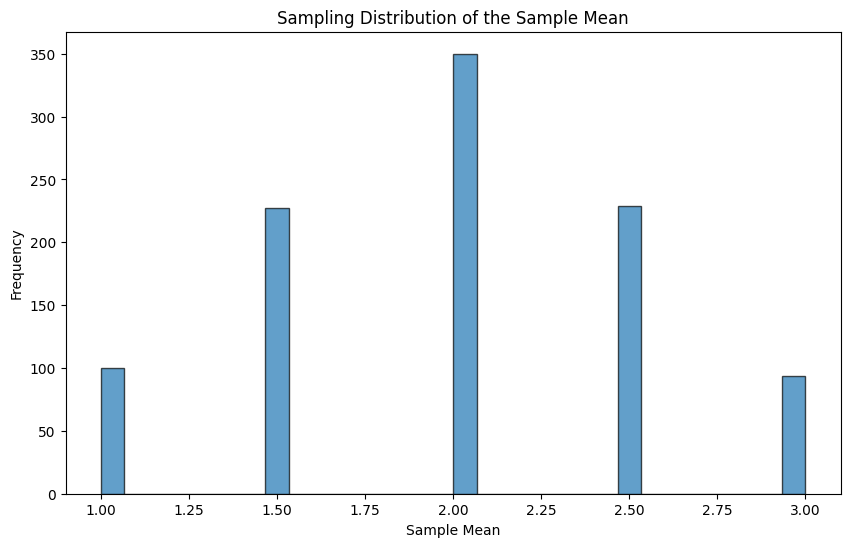

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the set to be used for sampling
elements = (1,2,3)

# Step 2: Define the sample size and the number of samples to draw
sample_size = 2
num_samples = 1000

# Step 3: Draw samples and calculate the mean of each sample
sample_means = [np.mean(np.random.choice(elements, sample_size)) for _ in range(num_samples)]

# Step 4: Plot the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
plt.title('Sampling Distribution of the Sample Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

We can also do this so that instead of sampling from a finite set of elements we are sampling from a population that is normally distributed with a mean of 50 and standard deviation of 10, of size 10000
Since our population will be larger- lets take samples of 30 at a time, and repeat this 1000 times...

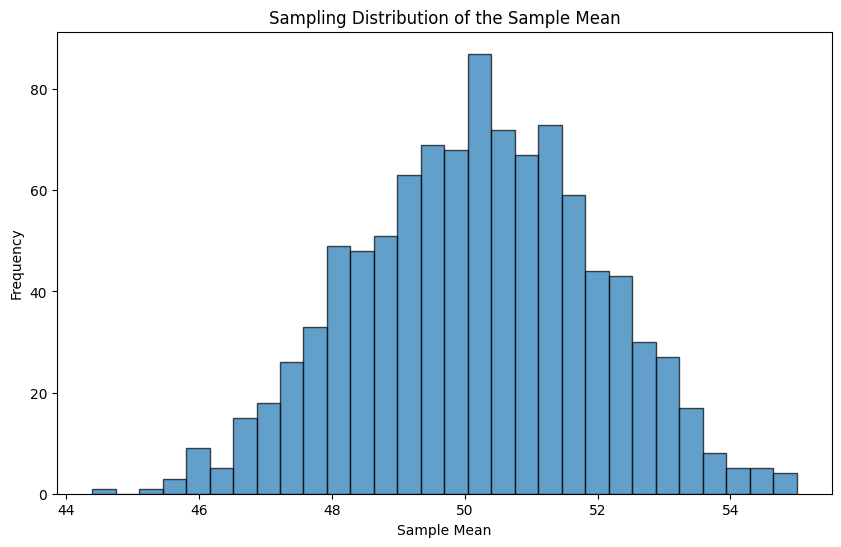

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a population
population = np.random.normal(loc=50, scale=10, size=10000)  # Normally distributed population

# Step 2: Define the sample size and the number of samples to draw
sample_size = 30
num_samples = 1000

# Step 3: Draw samples and calculate the mean of each sample
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

# Step 4: Plot the sampling distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, edgecolor='black', alpha=0.7)
plt.title('Sampling Distribution of the Sample Mean')
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.show()

Lets recap:

* **Population:** A normally distributed population is generated with a mean
(`loc` in Python, `mean` in R) of 50 and a standard deviation (`scale` in Python, `sd` in R) of 10.
* **Sample Size:** We draw samples of size `30` from this population.
* **Number of Samples:** We repeat the sampling process `1,000` times to create the sampling distribution.
* **Sample Means:** For each sample, the mean is calculated and stored.
* **Visualization:** A `histogram` of the sample means is plotted, showing the sampling distribution.

It looks roughly like a normal distribution but there are some irregularities. Lets fit the curve for normal distribution we used to draw samples from aswell to help see how bad are the irregularities.

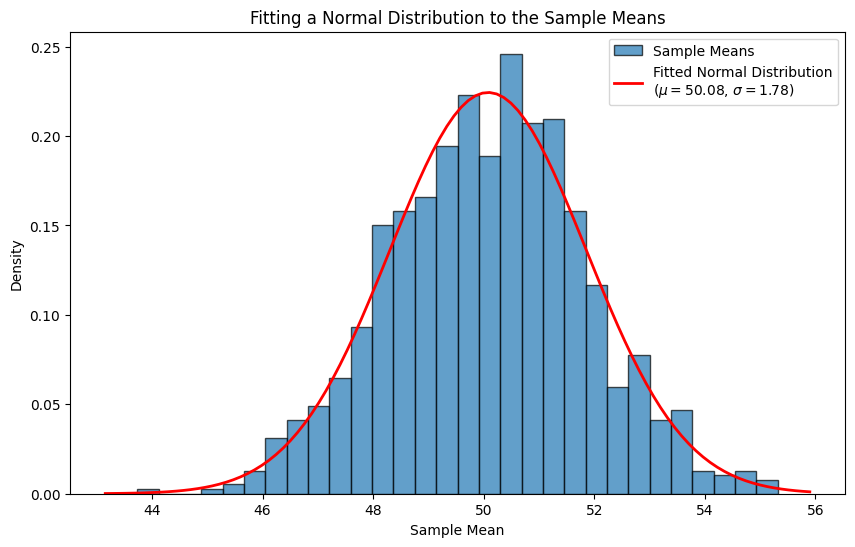

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


#Step 1a : Generate a population to sample that has a normal distribution
population = np.random.normal(loc=50, scale=10, size=10000)  # Normally distributed population

# Step 1b: You can also generate a population with a Non-Normal Distribution
#population = np.random.exponential(scale=2, size=10000)  # Exponential distribution

# Step 2: Draw Samples and Calculate Sample Means
sample_size = 30
num_samples = 1000
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

# Step 3: Fit a Normal Distribution to the Sample Means
mu, std = stats.norm.fit(sample_means)

# Step 4: Plot the Histogram and the Fitted Normal Distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, edgecolor='black', alpha=0.7, label='Sample Means')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label=f'Fitted Normal Distribution\n($\mu={mu:.2f}$, $\sigma={std:.2f}$)')
plt.title('Fitting a Normal Distribution to the Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()



The irregularities are highlighted better when we overlay the actual distribution. Another way to check for these and try and quantify the deviation from an expectation is to use a QQ-plot.

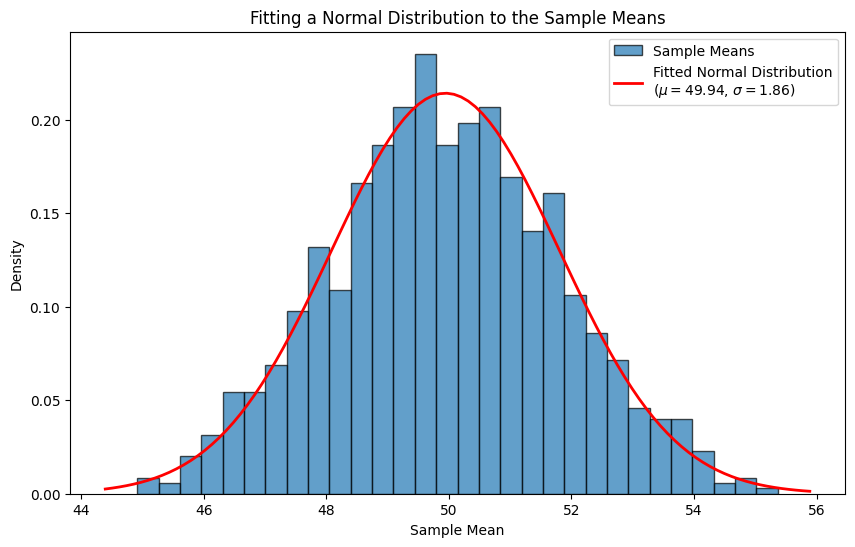

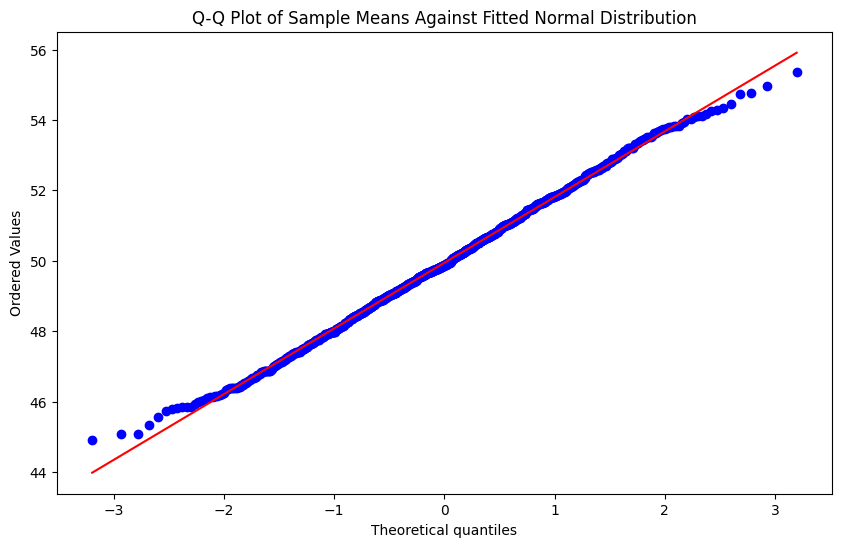

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#Step 1 : Generate a population to sample that has a normal distribution
population = np.random.normal(loc=50, scale=10, size=10000)  # Normally distributed population

# Step 2: Draw Samples and Calculate Sample Means
sample_size = 30
num_samples = 1000
sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]

# Step 3: Fit a Normal Distribution to the Sample Means
mu, std = stats.norm.fit(sample_means)

# Step 4: Plot the Histogram and the Fitted Normal Distribution
plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=30, density=True, edgecolor='black', alpha=0.7, label='Sample Means')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2, label=f'Fitted Normal Distribution\n($\mu={mu:.2f}$, $\sigma={std:.2f}$)')
plt.title('Fitting a Normal Distribution to the Sample Means')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.show()

# Step 5: Q-Q Plot to Confirm Normality
plt.figure(figsize=(10, 6))
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title('Q-Q Plot of Sample Means Against Fitted Normal Distribution')
plt.show()

* **Histogram:** The histogram of the sample means is plotted with the fitted normal distribution overlaid. This shows how well the normal distribution fits the sample means.
* **Q-Q Plot:** This plot compares the quantiles of the sample means to the theoretical quantiles of the fitted normal distribution. Points close to the 45-degree line indicate a good fit.

# Extra credit:
Can you think of an algorithmic way to quantify how well the observed values fit the theoretical expectation?